In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
from HyperParameterTuning import *


# from MakeSTFTs import *
# from Train import *
# from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

Using device=mps
Using sample rate=44100 Hz, FFT=1024 buckets, hop=768 samples, duration=2.0 sec = 114 time steps


In [3]:
# Read all available samples and convert to STFTs
#make_STFTs()

Loaded 961 STFTs from STFTs.pkl


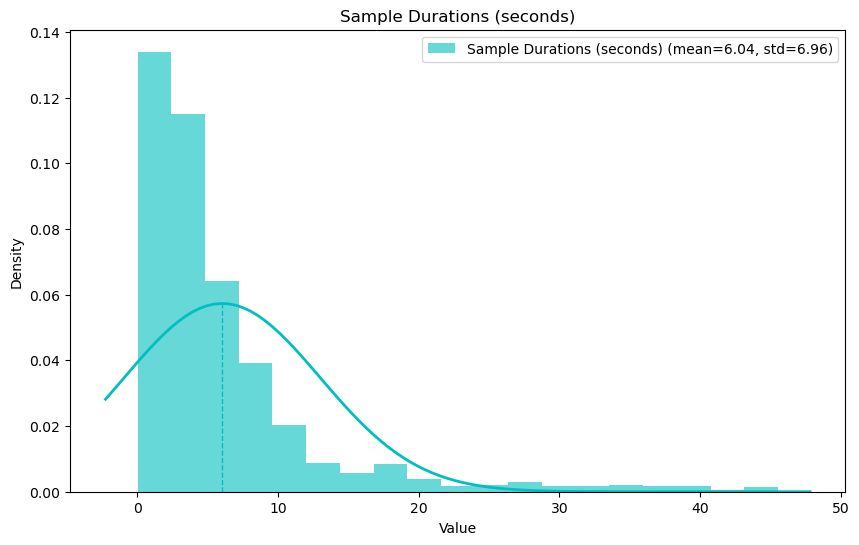

Augmenting training dataset using 190 random mixes
Using train=950 samples, test=190 samples.
1024 frequencies, 114 time-steps, maximum model size is 22,179,840 parameters.
Using model=Incremental_StepWiseVAEMLP
Optimising hyper-parameters:


[Integer(low=2, high=4, prior='uniform', transform='identity'),
 Real(low=1e-07, high=0.01, prior='log-uniform', transform='identity'),
 Real(low=1e-09, high=0.01, prior='log-uniform', transform='identity'),
 Integer(low=4, high=20, prior='uniform', transform='identity'),
 Integer(low=1, high=7, prior='uniform', transform='identity'),
 Real(low=0.2, high=5, prior='uniform', transform='identity')]

Hyper-Parameter tuning#1: [3, 0.005024468572033155, 9.61520917440513e-05, 8, 6, 0.7120665944778821]

optimiser: Adam batch=8, learning_rate=0.04, weight_decay=9.6e-05
Using model=StepWiseMLP
make_stepwiseMLPVAE: [165, 4, 0.3187354618451725, 8, 6, 0.7120665944778821]
StepWiseMLP control=165, depth=4, ratio=0.32, latent=8, VAE depth=6, VAE ratio=0.71
Model is too large: approx 854,965,693 parameters vs max=22,179,840
Hyper-Parameter tuning#2: [4, 1.588876471955853e-05, 3.0405961170067386e-08, 16, 3, 3.112066594477882]

optimiser: Adam batch=16, learning_rate=0.00025, weight_decay=3e-08
StepWiseMLP control=16, depth=3, ratio=3.11
StepWiseMLPAutoEncoder 5,886,290 parameters, compression=64.0
StepWiseMLP 5,886,290 parameters
model: StepWiseMLP control=16, depth=3, ratio=3.11 (5,886,290 parameters)
train=950 samples, batch=16 --> 59.4 batches/epoch
total=9 sec, epoch=1 (8.9 sec/epoch), train=1300.21 (0.00%), test=823.31 (0.00%), overfit=0.63
total=18 sec, epoch=2 (8.8 sec/epoch), train=599.3

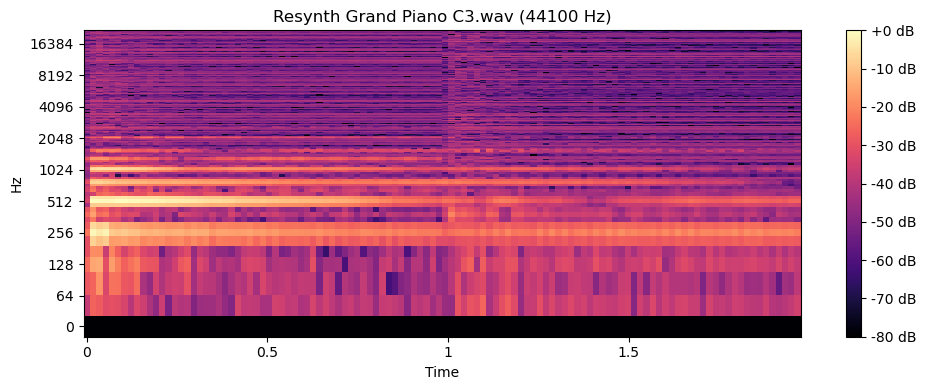

total=52 sec, epoch=6 (8.7 sec/epoch), train=260.21 (-5.33%), test=273.23 (4.22%), overfit=1.05
total=62 sec, epoch=7 (8.8 sec/epoch), train=253.82 (-2.46%), test=243.60 (-10.84%), overfit=0.96
*** Best! loss=246.54, StepWiseMLP control=16, depth=3, ratio=3.11 (5,886,290 parameters), Adam batch=16, learning_rate=0.00025, weight_decay=3e-08
hyper-parameters: [4, 1.588876471955853e-05, 3.0405961170067386e-08, 16, 3, 3.112066594477882]


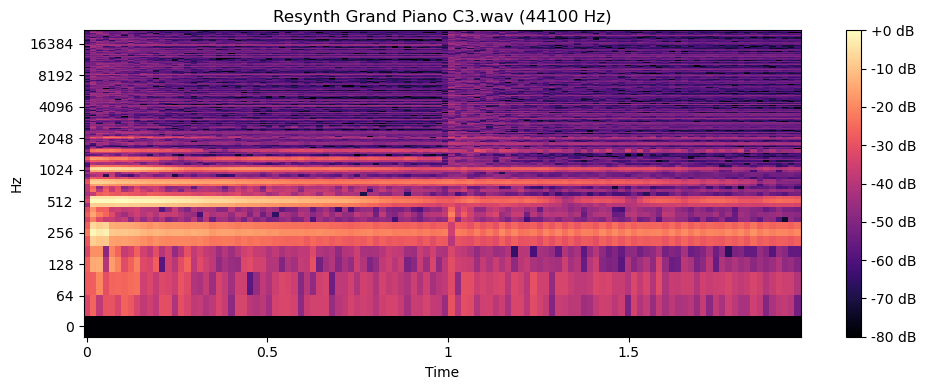

total=70 sec, epoch=8 (8.8 sec/epoch), train=246.54 (-2.87%), test=240.83 (-1.14%), overfit=0.98
total=79 sec, epoch=9 (8.8 sec/epoch), train=244.89 (-0.67%), test=231.77 (-3.76%), overfit=0.95
total=88 sec, epoch=10 (8.8 sec/epoch), train=240.00 (-2.00%), test=229.67 (-0.91%), overfit=0.96
total=96 sec, epoch=11 (8.8 sec/epoch), train=237.97 (-0.85%), test=224.66 (-2.18%), overfit=0.94
total=105 sec, epoch=12 (8.8 sec/epoch), train=237.34 (-0.27%), test=229.28 (2.06%), overfit=0.97
total=114 sec, epoch=13 (8.8 sec/epoch), train=234.53 (-1.18%), test=221.27 (-3.49%), overfit=0.94
total=122 sec, epoch=14 (8.7 sec/epoch), train=234.68 (0.06%), test=221.46 (0.08%), overfit=0.94
*** Best! loss=233.56, StepWiseMLP control=16, depth=3, ratio=3.11 (5,886,290 parameters), Adam batch=16, learning_rate=0.00025, weight_decay=3e-08
hyper-parameters: [4, 1.588876471955853e-05, 3.0405961170067386e-08, 16, 3, 3.112066594477882]


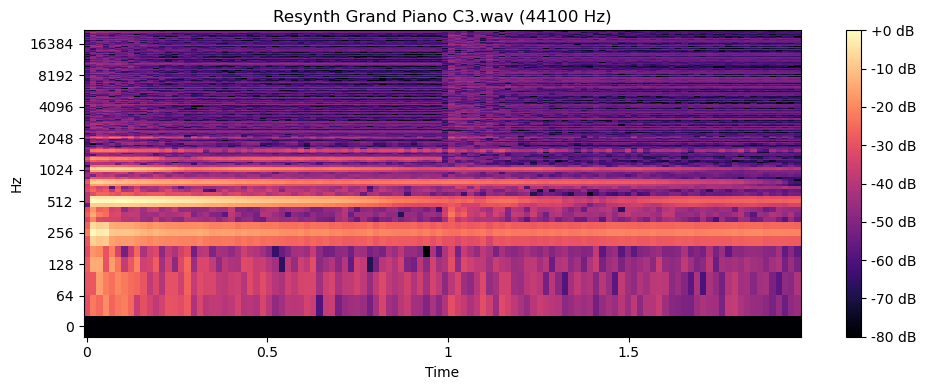

total=131 sec, epoch=15 (8.7 sec/epoch), train=233.56 (-0.48%), test=218.13 (-1.50%), overfit=0.93
total=140 sec, epoch=16 (8.7 sec/epoch), train=231.16 (-1.02%), test=216.75 (-0.63%), overfit=0.94
total=149 sec, epoch=17 (8.7 sec/epoch), train=230.76 (-0.18%), test=214.63 (-0.98%), overfit=0.93
total=157 sec, epoch=18 (8.7 sec/epoch), train=229.38 (-0.60%), test=213.65 (-0.46%), overfit=0.93
total=166 sec, epoch=19 (8.7 sec/epoch), train=228.93 (-0.20%), test=213.76 (0.05%), overfit=0.93
total=175 sec, epoch=20 (8.7 sec/epoch), train=228.78 (-0.07%), test=217.26 (1.64%), overfit=0.95
total=183 sec, epoch=21 (8.7 sec/epoch), train=227.75 (-0.45%), test=216.89 (-0.17%), overfit=0.95
total=192 sec, epoch=22 (8.7 sec/epoch), train=227.05 (-0.31%), test=217.99 (0.51%), overfit=0.96
total=201 sec, epoch=23 (8.7 sec/epoch), train=226.24 (-0.36%), test=212.27 (-2.63%), overfit=0.94
total=209 sec, epoch=24 (8.7 sec/epoch), train=224.09 (-0.95%), test=219.79 (3.54%), overfit=0.98
total=218 sec,

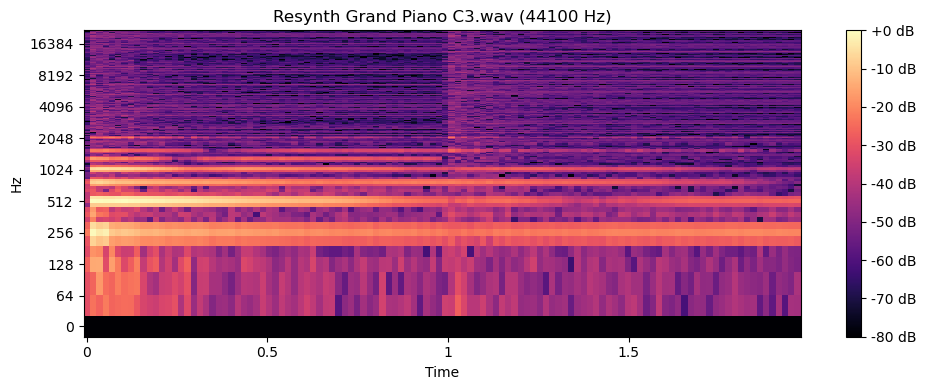

total=244 sec, epoch=28 (8.7 sec/epoch), train=221.76 (-0.16%), test=210.65 (-0.29%), overfit=0.95
total=253 sec, epoch=29 (8.7 sec/epoch), train=220.59 (-0.53%), test=207.87 (-1.32%), overfit=0.94
total=261 sec, epoch=30 (8.7 sec/epoch), train=219.07 (-0.69%), test=207.07 (-0.39%), overfit=0.95
total=270 sec, epoch=31 (8.7 sec/epoch), train=221.20 (0.98%), test=208.34 (0.62%), overfit=0.94
total=279 sec, epoch=32 (8.7 sec/epoch), train=218.67 (-1.14%), test=206.11 (-1.07%), overfit=0.94
total=287 sec, epoch=33 (8.7 sec/epoch), train=218.54 (-0.06%), test=205.61 (-0.24%), overfit=0.94
total=296 sec, epoch=34 (8.7 sec/epoch), train=217.19 (-0.62%), test=287.08 (39.62%), overfit=1.32
total=304 sec, epoch=35 (8.7 sec/epoch), train=284.01 (30.77%), test=213.19 (-25.74%), overfit=0.75
total=313 sec, epoch=36 (8.7 sec/epoch), train=219.72 (-22.64%), test=207.56 (-2.64%), overfit=0.94
total=322 sec, epoch=37 (8.7 sec/epoch), train=216.49 (-1.47%), test=204.56 (-1.45%), overfit=0.94
total=330 

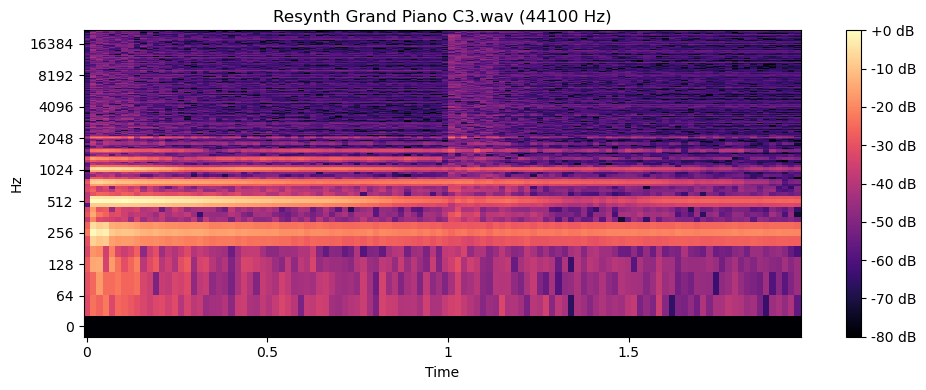

total=365 sec, epoch=42 (8.7 sec/epoch), train=210.40 (-1.12%), test=199.45 (-0.59%), overfit=0.95
total=374 sec, epoch=43 (8.7 sec/epoch), train=210.91 (0.24%), test=199.43 (-0.01%), overfit=0.95
total=383 sec, epoch=44 (8.7 sec/epoch), train=209.94 (-0.46%), test=200.53 (0.55%), overfit=0.96
total=391 sec, epoch=45 (8.7 sec/epoch), train=209.29 (-0.31%), test=199.23 (-0.65%), overfit=0.95
total=400 sec, epoch=46 (8.7 sec/epoch), train=208.35 (-0.45%), test=198.25 (-0.49%), overfit=0.95
total=408 sec, epoch=47 (8.7 sec/epoch), train=207.90 (-0.22%), test=198.08 (-0.08%), overfit=0.95
total=417 sec, epoch=48 (8.7 sec/epoch), train=206.58 (-0.63%), test=197.70 (-0.19%), overfit=0.96
total=426 sec, epoch=49 (8.7 sec/epoch), train=209.25 (1.29%), test=200.32 (1.33%), overfit=0.96
total=434 sec, epoch=50 (8.7 sec/epoch), train=206.67 (-1.24%), test=196.29 (-2.01%), overfit=0.95
total=443 sec, epoch=51 (8.7 sec/epoch), train=206.87 (0.10%), test=200.75 (2.27%), overfit=0.97
total=451 sec, e

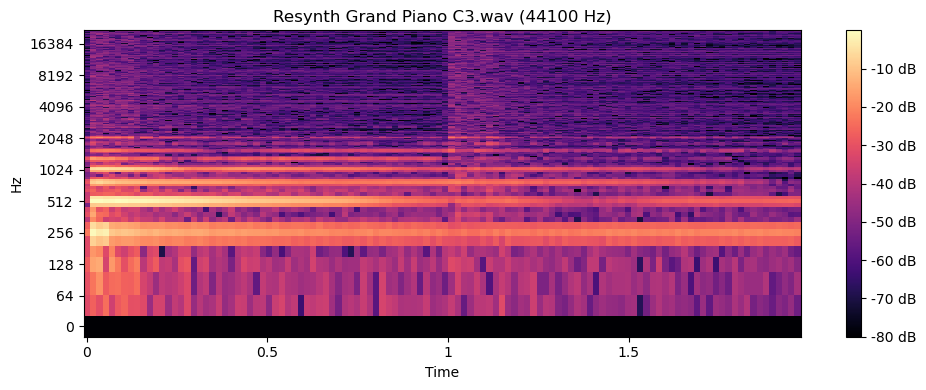

total=529 sec, epoch=61 (8.7 sec/epoch), train=197.54 (-2.63%), test=194.41 (-0.22%), overfit=0.98
total=537 sec, epoch=62 (8.7 sec/epoch), train=199.52 (1.01%), test=194.70 (0.15%), overfit=0.98
total=546 sec, epoch=63 (8.7 sec/epoch), train=200.57 (0.52%), test=193.87 (-0.42%), overfit=0.97
total=555 sec, epoch=64 (8.7 sec/epoch), train=199.33 (-0.62%), test=192.24 (-0.84%), overfit=0.96
total=563 sec, epoch=65 (8.7 sec/epoch), train=198.40 (-0.46%), test=197.96 (2.98%), overfit=1.00
total=572 sec, epoch=66 (8.7 sec/epoch), train=199.02 (0.31%), test=198.35 (0.20%), overfit=1.00
total=580 sec, epoch=67 (8.7 sec/epoch), train=199.31 (0.15%), test=194.75 (-1.81%), overfit=0.98
total=589 sec, epoch=68 (8.7 sec/epoch), train=197.88 (-0.72%), test=190.83 (-2.02%), overfit=0.96
total=598 sec, epoch=69 (8.7 sec/epoch), train=197.46 (-0.22%), test=193.25 (1.27%), overfit=0.98
total=606 sec, epoch=70 (8.7 sec/epoch), train=195.85 (-0.81%), test=194.08 (0.43%), overfit=0.99
Model stalled.


Fi

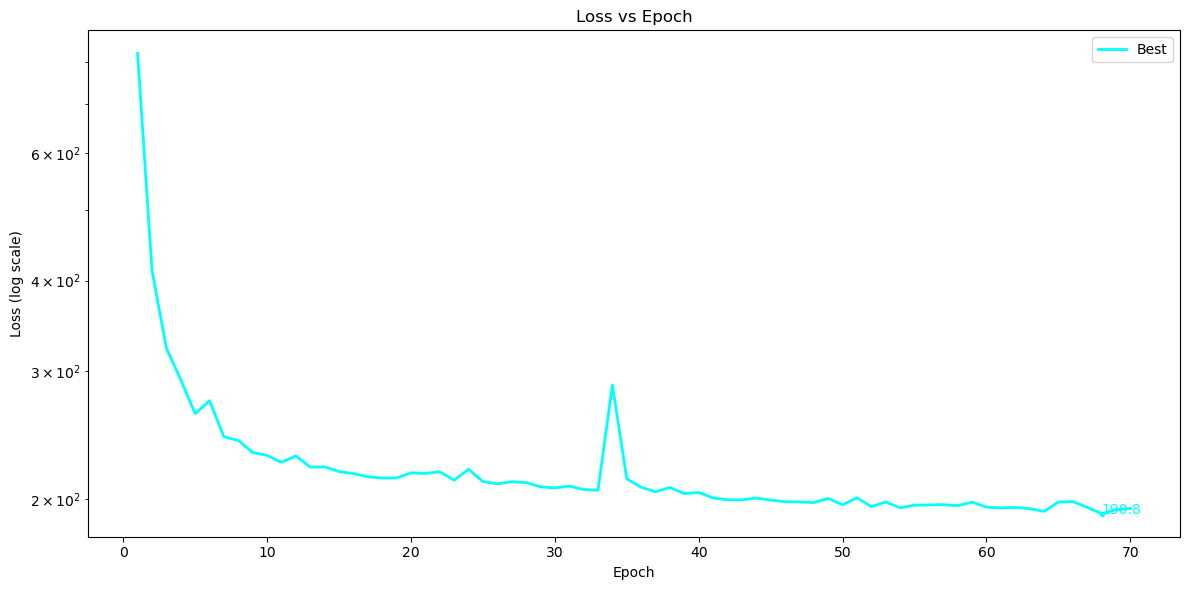

Hyper-Parameter tuning#3: [2, 8.934909008034209e-07, 1.7098528498061993e-06, 12, 4, 1.912066594477882]

optimiser: Adam batch=4, learning_rate=3.6e-06, weight_decay=1.7e-06
StepWiseMLP control=12, depth=4, ratio=1.91
StepWiseMLPAutoEncoder 8,888,376 parameters, compression=85.3
StepWiseMLP 8,888,376 parameters
model: StepWiseMLP control=12, depth=4, ratio=1.91 (8,888,376 parameters)
train=950 samples, batch=4 --> 237.5 batches/epoch
total=50 sec, epoch=1 (50.0 sec/epoch), train=456.20 (0.00%), test=403.07 (0.00%), overfit=0.88
total=100 sec, epoch=2 (50.0 sec/epoch), train=371.54 (-18.56%), test=354.22 (-12.12%), overfit=0.95
total=150 sec, epoch=3 (49.9 sec/epoch), train=345.55 (-7.00%), test=342.97 (-3.18%), overfit=0.99
total=199 sec, epoch=4 (49.8 sec/epoch), train=335.42 (-2.93%), test=324.22 (-5.47%), overfit=0.97
total=249 sec, epoch=5 (49.9 sec/epoch), train=310.27 (-7.50%), test=285.13 (-12.06%), overfit=0.92
total=299 sec, epoch=6 (49.9 sec/epoch), train=281.17 (-9.38%), test

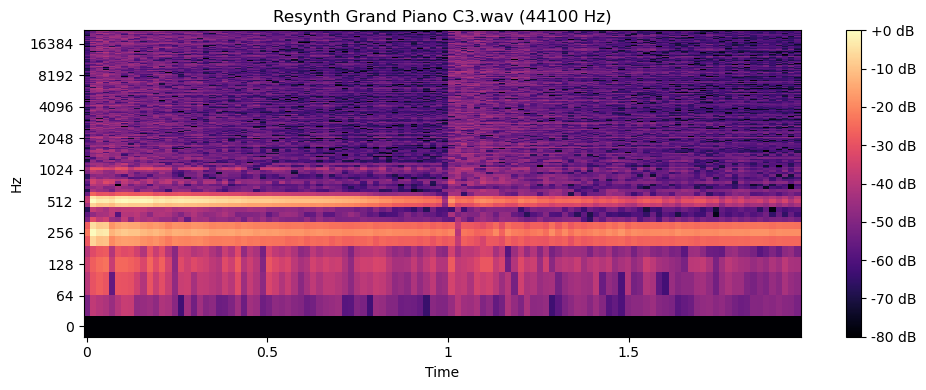

total=648 sec, epoch=13 (49.8 sec/epoch), train=182.09 (-4.13%), test=162.47 (-4.69%), overfit=0.89
total=698 sec, epoch=14 (49.8 sec/epoch), train=174.65 (-4.09%), test=156.30 (-3.80%), overfit=0.89
*** Best! loss=169.60, StepWiseMLP control=12, depth=4, ratio=1.91 (8,888,376 parameters), Adam batch=4, learning_rate=3.6e-06, weight_decay=1.7e-06
hyper-parameters: [2, 8.934909008034209e-07, 1.7098528498061993e-06, 12, 4, 1.912066594477882]


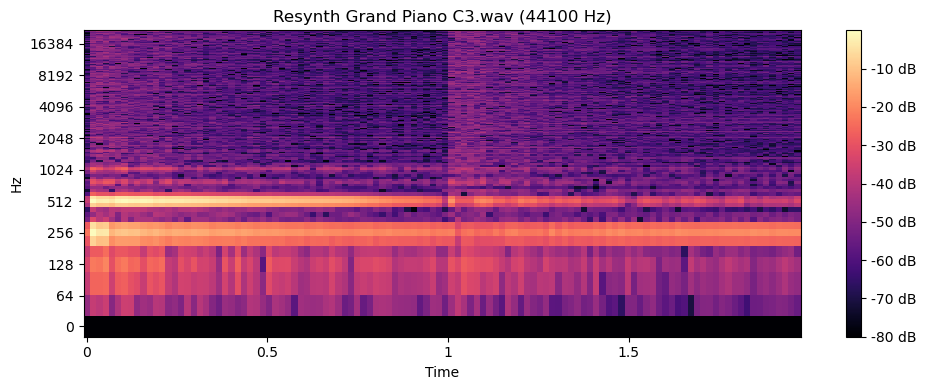

total=748 sec, epoch=15 (49.8 sec/epoch), train=169.60 (-2.89%), test=152.00 (-2.76%), overfit=0.90
total=798 sec, epoch=16 (49.9 sec/epoch), train=165.22 (-2.58%), test=148.21 (-2.49%), overfit=0.90
*** Best! loss=160.92, StepWiseMLP control=12, depth=4, ratio=1.91 (8,888,376 parameters), Adam batch=4, learning_rate=3.6e-06, weight_decay=1.7e-06
hyper-parameters: [2, 8.934909008034209e-07, 1.7098528498061993e-06, 12, 4, 1.912066594477882]


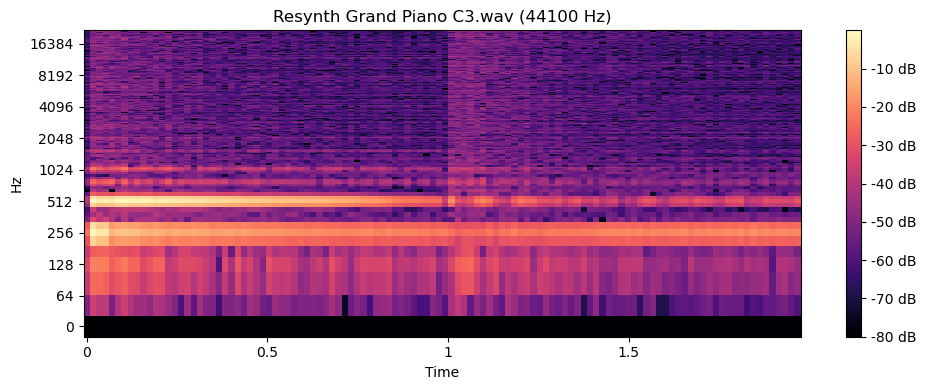

total=848 sec, epoch=17 (49.9 sec/epoch), train=160.92 (-2.60%), test=143.90 (-2.91%), overfit=0.89
total=899 sec, epoch=18 (49.9 sec/epoch), train=155.65 (-3.27%), test=138.98 (-3.42%), overfit=0.89
*** Best! loss=149.78, StepWiseMLP control=12, depth=4, ratio=1.91 (8,888,376 parameters), Adam batch=4, learning_rate=3.6e-06, weight_decay=1.7e-06
hyper-parameters: [2, 8.934909008034209e-07, 1.7098528498061993e-06, 12, 4, 1.912066594477882]


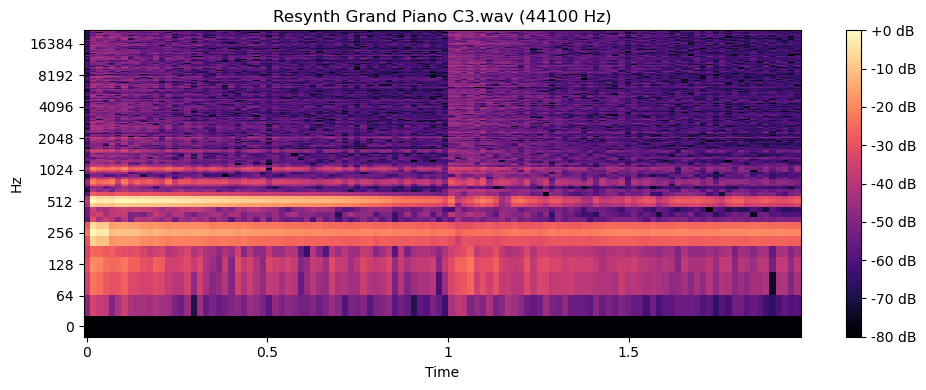

total=949 sec, epoch=19 (50.0 sec/epoch), train=149.78 (-3.77%), test=134.00 (-3.58%), overfit=0.89
total=1000 sec, epoch=20 (50.0 sec/epoch), train=144.04 (-3.83%), test=129.17 (-3.60%), overfit=0.90
*** Best! loss=139.31, StepWiseMLP control=12, depth=4, ratio=1.91 (8,888,376 parameters), Adam batch=4, learning_rate=3.6e-06, weight_decay=1.7e-06
hyper-parameters: [2, 8.934909008034209e-07, 1.7098528498061993e-06, 12, 4, 1.912066594477882]


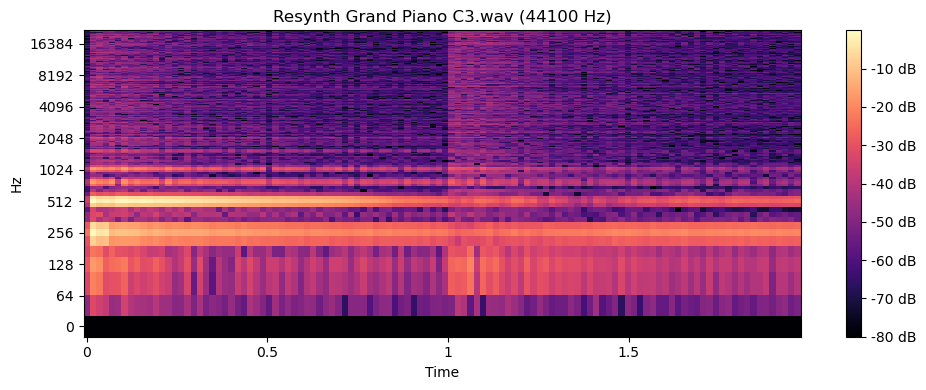

total=1051 sec, epoch=21 (50.0 sec/epoch), train=139.31 (-3.28%), test=125.42 (-2.90%), overfit=0.90
total=1103 sec, epoch=22 (50.1 sec/epoch), train=135.41 (-2.79%), test=122.40 (-2.41%), overfit=0.90
*** Best! loss=132.03, StepWiseMLP control=12, depth=4, ratio=1.91 (8,888,376 parameters), Adam batch=4, learning_rate=3.6e-06, weight_decay=1.7e-06
hyper-parameters: [2, 8.934909008034209e-07, 1.7098528498061993e-06, 12, 4, 1.912066594477882]


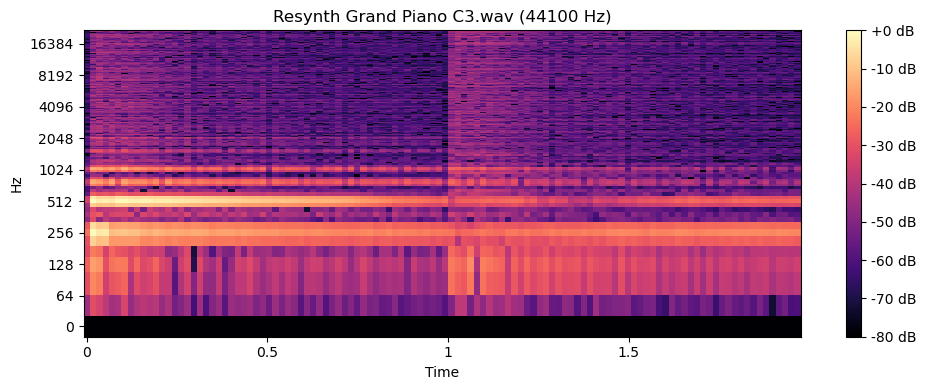

total=1154 sec, epoch=23 (50.2 sec/epoch), train=132.03 (-2.50%), test=119.39 (-2.46%), overfit=0.90
total=1205 sec, epoch=24 (50.2 sec/epoch), train=128.62 (-2.58%), test=116.55 (-2.38%), overfit=0.91
*** Best! loss=124.98, StepWiseMLP control=12, depth=4, ratio=1.91 (8,888,376 parameters), Adam batch=4, learning_rate=3.6e-06, weight_decay=1.7e-06
hyper-parameters: [2, 8.934909008034209e-07, 1.7098528498061993e-06, 12, 4, 1.912066594477882]


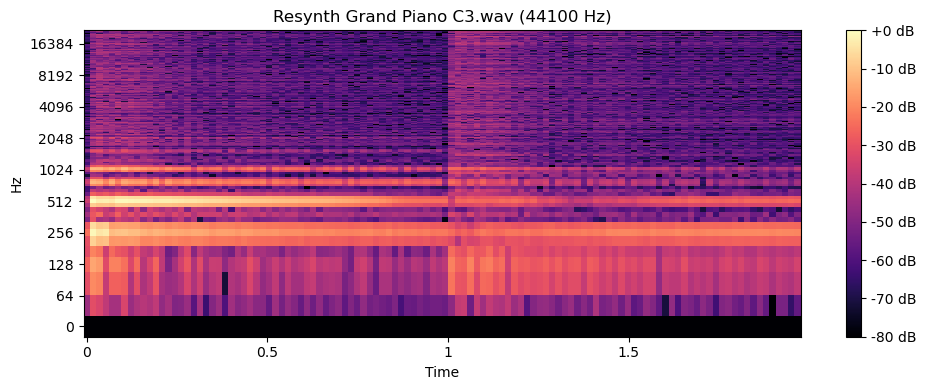

total=1255 sec, epoch=25 (50.2 sec/epoch), train=124.98 (-2.84%), test=113.51 (-2.61%), overfit=0.91
total=1305 sec, epoch=26 (50.2 sec/epoch), train=121.63 (-2.68%), test=110.42 (-2.73%), overfit=0.91
*** Best! loss=118.15, StepWiseMLP control=12, depth=4, ratio=1.91 (8,888,376 parameters), Adam batch=4, learning_rate=3.6e-06, weight_decay=1.7e-06
hyper-parameters: [2, 8.934909008034209e-07, 1.7098528498061993e-06, 12, 4, 1.912066594477882]


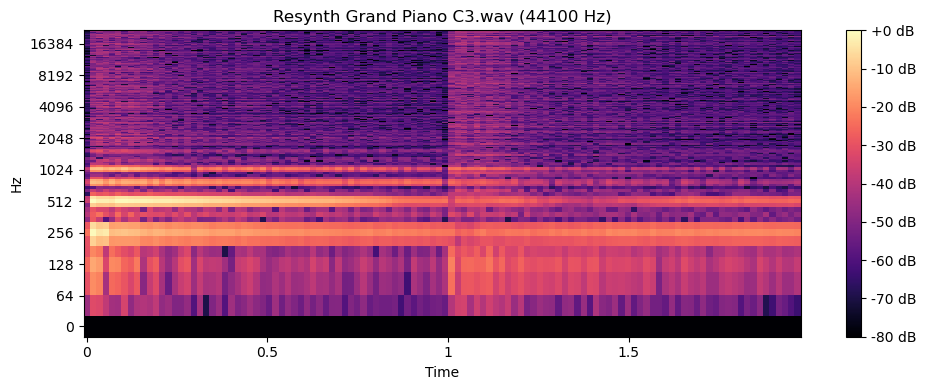

total=1355 sec, epoch=27 (50.2 sec/epoch), train=118.15 (-2.86%), test=107.63 (-2.52%), overfit=0.91
total=1405 sec, epoch=28 (50.2 sec/epoch), train=114.98 (-2.69%), test=105.04 (-2.41%), overfit=0.91
*** Best! loss=112.24, StepWiseMLP control=12, depth=4, ratio=1.91 (8,888,376 parameters), Adam batch=4, learning_rate=3.6e-06, weight_decay=1.7e-06
hyper-parameters: [2, 8.934909008034209e-07, 1.7098528498061993e-06, 12, 4, 1.912066594477882]


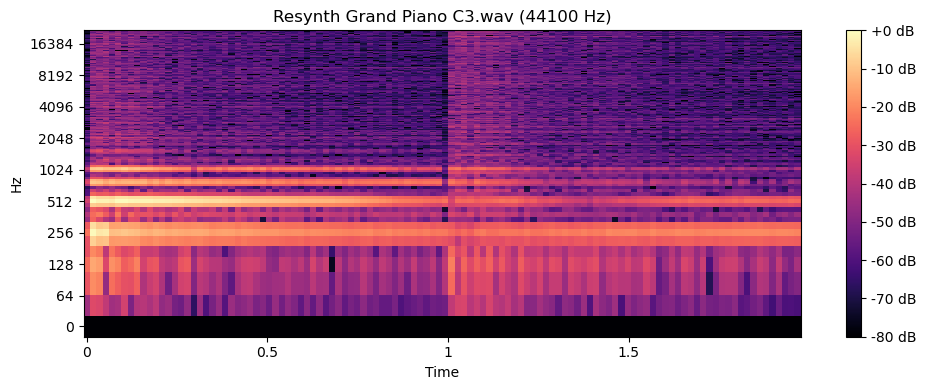

total=1455 sec, epoch=29 (50.2 sec/epoch), train=112.24 (-2.38%), test=102.85 (-2.09%), overfit=0.92
total=1506 sec, epoch=30 (50.2 sec/epoch), train=110.10 (-1.90%), test=101.29 (-1.52%), overfit=0.92
total=1557 sec, epoch=31 (50.2 sec/epoch), train=108.56 (-1.40%), test=100.24 (-1.04%), overfit=0.92
total=1607 sec, epoch=32 (50.2 sec/epoch), train=107.28 (-1.18%), test=99.43 (-0.81%), overfit=0.93


In [ ]:
# Find out the best hyper-parameters to train this model (typically needs to run overnight)
optimise_hyper_parameters()

# Alternatively: train a model with the best hyper-parameters we've found so far.
#train_best_params()

In [ ]:
# Generate some new samples, either by interpolation or random perturbation
from Generate import *

# Test every sample and measure the error.
test_all()

# Create graphs of pair-wise encoding plots for a number of categories:
#plot_categories(["Vocal", "Piano", "Strings"])
plot_categories()

# Create a graph of various encodings: this is how I find out that a small latent layer should be feasible
plot_encodings()

#generate_morphs()

#generate_variations()

# Generate samples from each variable
#generate_main_encodings()